s spodnjo funkcijo generiramo vse eno ciklične grafe na n vozliščih. Funkcija deluje počasi že za 8 vozlišč. grafov je takrat že več 89 tako, da celostno analizo za večje število vozlič sploh ni smiselno računati.


In [3]:
eno_ciklicni =[]
for G in graphs(5, size=5):
    if G.is_connected():
        if len(G.cycle_basis('vertex')) == 1:
            eno_ciklicni.append(G)
            #G.show()

In [4]:
len(eno_ciklicni)

5

In [3]:
def AZIvrednost(graf, alpha=3): #Izračun AZI vrednost za nek graf
    vsota = 0
    for u in graf:
        for v in graf[u]:
            vsota = vsota + ((len(graf[u]) *len(graf[v]))/(len(graf[u]) + len(graf[v]) - 2))^(alpha)
    return vsota/2

In [6]:
AZI_vred = {}
for G in eno_ciklicni:
    a = AZIvrednost(G, 3)
    AZI_vred[a] = (G)

poračunamo ekstremalne vrednosti AZI za vse enciklične grafe in jo izpišemo skupaj z pripadajočim grafom

40


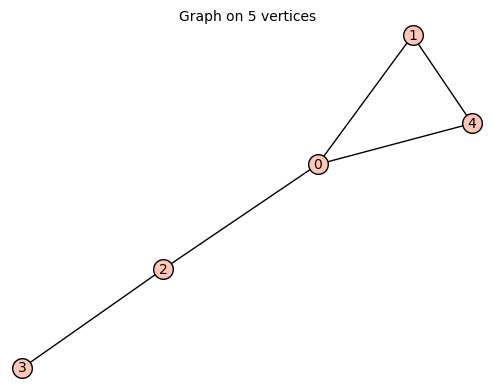

In [7]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

776/27


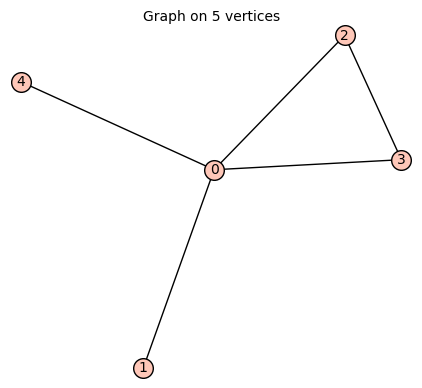

In [8]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

Za velika števila bomo poizkušali rezultat dobiti z iskanjem maksimuma po metodi spreminjanja do sedaj najbolše metode, dela do n=40


In [9]:
def generiranje_grafa(n):
    A = graphs.RandomTree(n)
    A.add_edge(A.complement().random_edge(labels=False))
    return A

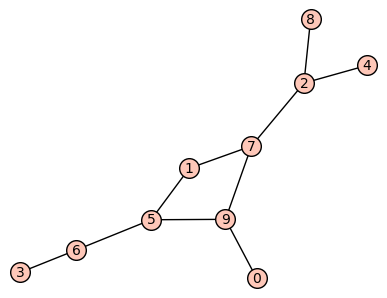

In [10]:
graf = B = generiranje_grafa(10)
B.show()

In [11]:
from random import choice
def minima(graf, n=100, alpha=3):
    najboljsa = trenutna = AZIvrednost(graf, alpha)
    najboljsi_graf = graf
    for j in range(n):
        T = n/(j+1)
        e = graf.random_edge(labels=False)
        K = Graph(graf)
        K.delete_edge(e)
        if K.is_connected():
            e = K.complement().random_edge()
        else:
            A, B = K.connected_components()
            e = (choice(A), choice(B))
        K.add_edge(e)
        a = AZIvrednost(K, alpha)
        if a < najboljsa:
            najboljsi_graf = K
            najboljsa = a
        if a < trenutna or exp((trenutna - a) / T) > random():
            graf = K
            trenutna = a
    najboljsi_graf.show()
    return (najboljsi_graf, najboljsa)

In [12]:
from random import choice
def maxima(graf, n=100, alpha=3):
    najboljsa = trenutna = AZIvrednost(graf, alpha)
    najboljsi_graf = graf
    for j in range(n):
        T = n/(j+1)
        e = graf.random_edge(labels=False)
        K = Graph(graf)
        K.delete_edge(e)
        if K.is_connected():
            e = K.complement().random_edge()
        else:
            A, B = K.connected_components()
            e = (choice(A), choice(B))
        K.add_edge(e)
        a = AZIvrednost(K, alpha)
        if a > najboljsa:
            najboljsi_graf = K
            najboljsa = a
        if a > trenutna or exp((trenutna - a) / T) > random():
            graf = K
            trenutna = a
    najboljsi_graf.show()
    return (najboljsi_graf, najboljsa)

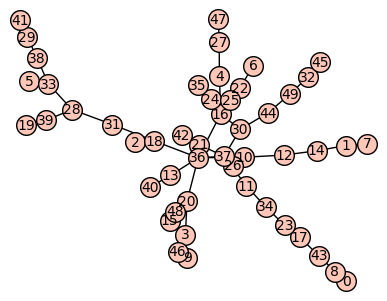

(Graph on 50 vertices, 5920376509/12348000)

In [18]:
graf = B = generiranje_grafa(50)
maxima(B, 100000)

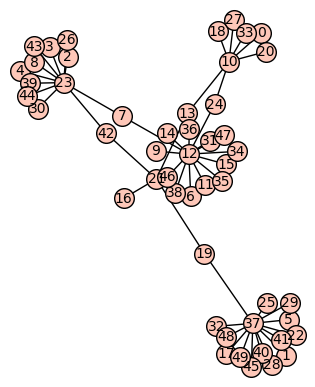

(Graph on 50 vertices, 989986522/7414875)

In [19]:
minima(B, 100000)

In [4]:
import json

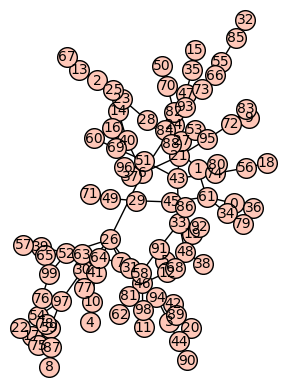

In [12]:
with open("max3_100_100.json") as f:
    Gmax = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmax.plot()

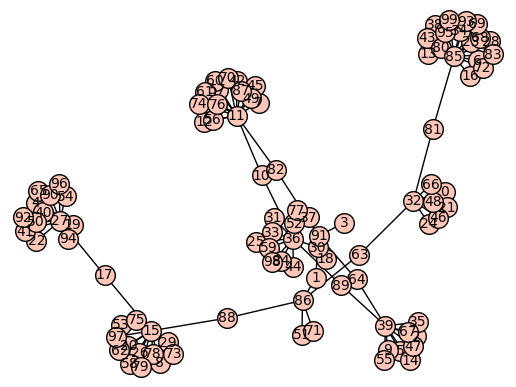

In [14]:
with open("min3_100_100.json") as f:
    Gmin = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmin.plot()

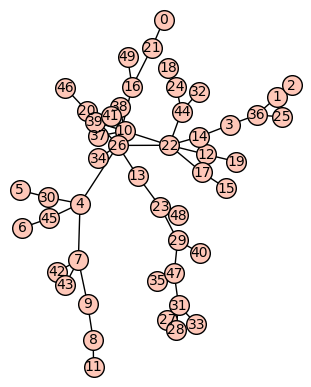

In [4]:
with open("max3_50_50.json") as f:
    Gmax = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmax.plot()

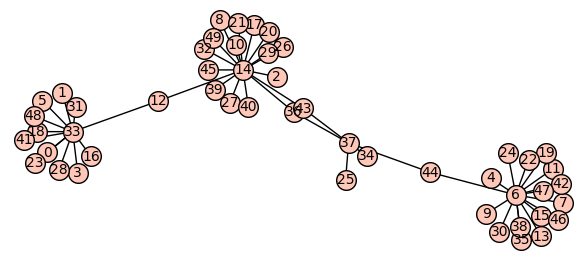

In [5]:
with open("min3_50_50.json") as f:
    Gmin = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmin.plot()

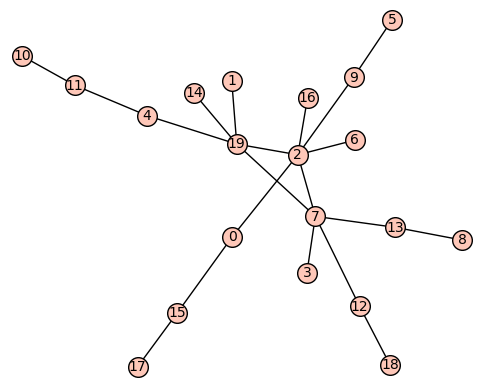

In [5]:
with open("max3_20_20.json") as f:
    G20max = Graph(str(json.load(f)), loops=False, multiedges=False)
G20max.plot()

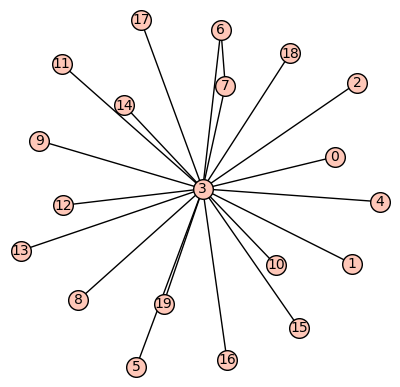

In [6]:
with open("min3_20_20.json") as f:
    G20min = Graph(str(json.load(f)), loops=False, multiedges=False)
G20min.plot()